# Project description:
Development of a model predicting the recovery rate of gold from gold ore.

The company develops solutions for the efficient operation of the gold mining industry. A model has been built that predicts the recovery rate of gold from gold-bearing ore. The data with the parameters of extraction and treatment are analyzed. A model has been built and trained to help optimize production in order not to launch an enterprise with unprofitable characteristics.

**Data description:**

The data is stored in three files:

gold_recovery_train.csv 

gold_recovery_test.csv 

gold_recovery_full.csv 

Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar.
Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.
The source dataset contains the training and test sets with all the features.

## 1. Prepare the data

### 1.1 Overview of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
try:
    train = pd.read_csv('gold_recovery_train.csv')
    test = pd.read_csv('gold_recovery_test.csv')
    full = pd.read_csv('gold_recovery_full.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv')
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
    full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
for data in [train, test, full]:
    display(data.head())
    print()
    print(data.info())
    print()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_cle

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64

In [4]:
# Shape of the datasets
for data in [train, test, full]:
    print('Shape:', data.shape)

Shape: (16860, 87)
Shape: (5856, 53)
Shape: (22716, 87)


In [5]:
# Duplicates
for data in [train, test, full]:
    print('Duplicates:', data.duplicated().sum())

Duplicates: 0
Duplicates: 0
Duplicates: 0


### 1.2 Calculation of recovery rate

c — *share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery) / after purification (for finding the final concentrate recovery)*

f — *share of gold in the feed before flotation (for finding the rougher concentrate recovery) / in the concentrate right after flotation (for finding the final concentrate recovery)*

t — *share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery) / after purification (for finding the final concentrate recovery)*

**recovery (%) = (c * (f - t)) / (f * (c - t))* 100** 

In [6]:
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']

recovery_list = (c * (f - t)) / (f * (c - t)) * 100
recovery_list.describe()

count    1.457700e+04
mean              NaN
std               NaN
min              -inf
25%      7.965104e+01
50%      8.521533e+01
75%      9.019726e+01
max               inf
dtype: float64

In [7]:
# Exclute the rates < 0 and > 1
recovery_list[recovery_list < 0] = np.nan
recovery_list[recovery_list > 100] = np.nan
recovery_list.fillna(0, inplace = True)
recovery_list.describe()

count    16860.000000
mean        69.820045
std         32.727816
min          0.000000
25%         73.913137
50%         83.405512
75%         89.343361
max        100.000000
dtype: float64

In [8]:
# Calculate the MAE between the calculation above and the target values
print('MAE:', (mean_absolute_error(recovery_list, train['rougher.output.recovery'].fillna(0))))

MAE: 8.01446690744355e-15


**Descriptions:**

According to our calculations, the MAE (mean absolute error) between the calculated recovery above and the target values is very small, so we can assume that our calculations are quite correct.

### 1.3 Look into features 

In [9]:
columns_not_in_1 = []
for column in train.columns:
    if column not in test.columns:
        columns_not_in_1.append(column)
print('number of features that are in train but not in test:', len(columns_not_in_1))

columns_not_in_2 = []
for column in test.columns:
    if column not in train.columns:
        columns_not_in_2.append(column)
print('number of features that are in test but not in train:', len(columns_not_in_2))

number of features that are in train but not in test: 34
number of features that are in test but not in train: 0


In [10]:
# Train has more features than test.
# Look at these features not in test.
train[columns_not_in_1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


In [11]:
# Exclude those 34 columns from the train dataset
train = train[test.columns]
# Remove the rows with nan values in both train and test datasets
train = train.dropna()
test = test.dropna()
# Look at datasets again
print('Train')
print(train.info())
print()
print('Test')
print(test.info())

Train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 16859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        13522 non-null  object 
 1   primary_cleaner.input.sulfate               13522 non-null  float64
 2   primary_cleaner.input.depressant            13522 non-null  float64
 3   primary_cleaner.input.feed_size             13522 non-null  float64
 4   primary_cleaner.input.xanthate              13522 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13522 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13522 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13522 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13522 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13522 non-null  float64
 10  prim

**Descriptions:**

1. All the features that are in train set but not in test set are numeric values. 

2. After removing the features that are not in test from train and dropping out all rows with nan values, we have a train set of 13522 rows and a test set with 5358 rows.

## 2. Analyze the data

### 2.1  Change in concentrations of metals (Au, Ag, Pb)  depending on the purification stage

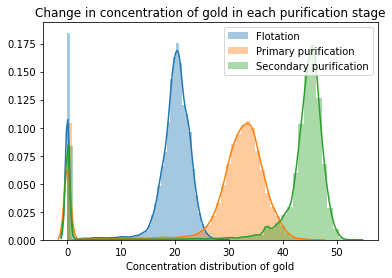

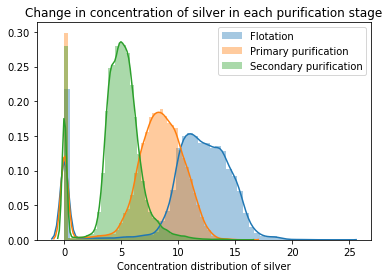

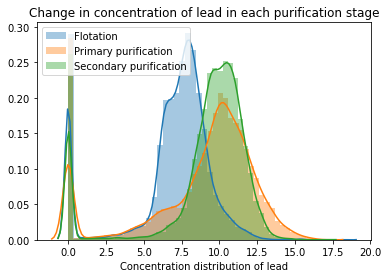

In [12]:
# Metals: Au (gold), Ag (silver), Pb (lead)
metals = [['au', 'gold'] , ['ag', 'silver'], ['pb', 'lead']]
# Purification stages: 
# rougher — flotation
# primary_cleaner — primary purification
# final — secondary purification
stages = [['rougher.output.concentrate_', 'Flotation'],
          ['primary_cleaner.output.concentrate_', 'Primary purification'], 
          ['final.output.concentrate_', 'Secondary purification']]
# Distribution of concentrations of metals in different purification stages
for metal in metals:
    plt.figure()
    for stage in stages:
        ax = sns.distplot(full[stage[0] + metal[0]], label = stage[1])
        plt.legend()
        _ = ax.set(xlabel = 'Concentration distribution of ' + metal[1],
                   title = 'Change in concentration of '+ metal[1] + ' in each purification stage')
    plt.show()

**Desciption:**

1. The concentration of gold rises after each stage of purification, while the contributions of other 2 metals don't change in that way.

2. There are a large number of outliers with values around zero.

### 2.2 Compare the feed particle size distributions in the training set and in the test set

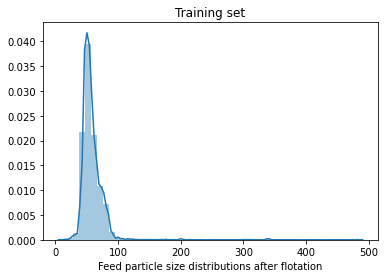

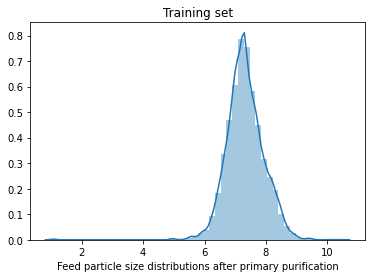

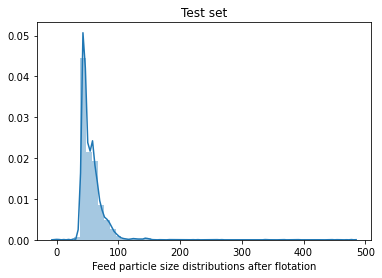

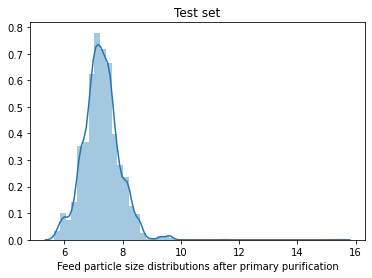

In [13]:
stages_feed_size = [['rougher.input.feed_size', 'flotation'],
          ['primary_cleaner.input.feed_size', 'primary purification']]
data_name = ['Training set', 'Test set']
for data, i in zip([train, test], range(2)):
    for stage in stages_feed_size:
        plt.figure()
        ax = sns.distplot(data[stage[0]])
        _ = ax.set(xlabel = 'Feed particle size distributions after ' + stage[1],
                  title = data_name[i])
        plt.show()                

**Description:**

Based on the graph, it can be seen that the distributions after each stage of purification are roughly the same, which means that the sizes of feed particles on the test and training sets are practically the same.

### 2.3 Total concentrations of all substances at different stages

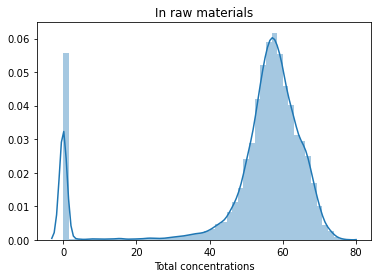

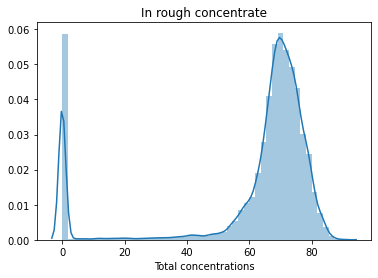

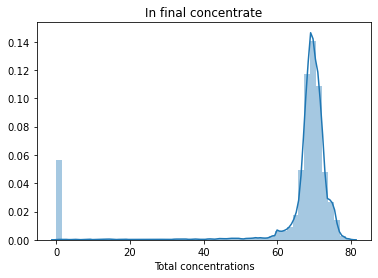

In [14]:
stages_all_concentrations = [['rougher.input.feed_', 'In raw materials'],
          ['rougher.output.concentrate_', 'In rough concentrate'], 
          ['final.output.concentrate_', 'In final concentrate']]

for stage in stages_all_concentrations:
    plt.figure()
    ax = sns.distplot(full[stage[0] + 'au'] + full[stage[0] + 'ag']
                      + full[stage[0] + 'pb'] + full[stage[0] + 'sol'])
    _ = ax.set(xlabel = 'Total concentrations', title = stage[1])
    plt.show()

**Descriptions:**

It is obvious that these are anomalies which equal 0. However, it cannot be that the concentrations of all substances at some stage were equal to zero. It is necessary to remove anomalies first.

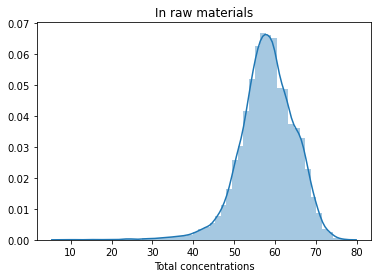

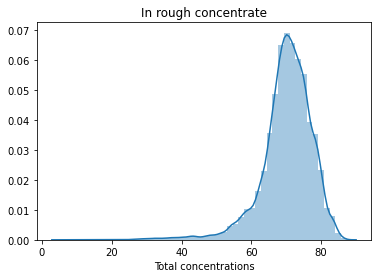

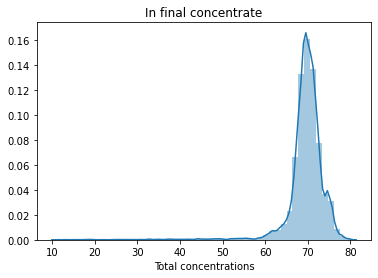

In [15]:
# Remove the 0 values
full_new = full.replace(0, np.nan)
full_new.dropna(inplace = True)

# Build new distribution diagrams
for stage in stages_all_concentrations:
    plt.figure()
    ax = sns.distplot(full_new[stage[0] + 'au'] + full_new[stage[0] + 'ag']
                      + full_new[stage[0] + 'pb'] + full_new[stage[0] + 'sol'])
    _ = ax.set(xlabel = 'Total concentrations', title = stage[1])
    plt.show()

**Descriptions:**

Based on the diagrams above, we can see that: 

1. The concentration of all substances tends to increase from raw material, rough concentrate to final concentrate.

2. The distrubution of concentration tends to be more concentrated from raw material, rough concentrate to final concentrate.

## 3. Build the model

### 3.1 Write a function to calculate the final sMAPE (symmetric Mean Absolute Percentage Error) value

In [16]:
# Write a function to calculate the final sMAPE (%)
def smape(y_target, y_predict):
    SMAPE = 1 / len(y_target) * np.sum(2 * np.abs(y_target - y_predict) / (np.abs(y_target) + np.abs(y_predict))) * 100
    return SMAPE

### 3.2 Train different machine learning models for predictions

1. 3 models are chosen in this step to be tested: **LinearRegression, Ridge, Lasso**

2. Using **cross-validation** and **sMAPE** to evaluate the models.

In [17]:
# Prepare the train and test sets
# 'Date' should be excluded from the features
test.set_index('date', inplace = True)
train.set_index('date', inplace = True)
full.set_index('date', inplace = True)

test_features = test
train_features = train

test_target_rougher = full.loc[test_features.index, 'rougher.output.recovery']
train_target_rougher = full.loc[train_features.index, 'rougher.output.recovery']

test_target_final = full.loc[test_features.index, 'final.output.recovery']
train_target_final = full.loc[train_features.index, 'final.output.recovery']

In [18]:
train_target_final = train_target_final.fillna(train_target_final.mean())
train_target_rougher = train_target_rougher.fillna(train_target_rougher.mean())
test_target_final = test_target_final.fillna(test_target_final.mean())
test_target_rougher = test_target_rougher.fillna(test_target_rougher.mean())

#### 3.2.1 LinearRegression

In [19]:
smape_score = make_scorer(smape, greater_is_better=False)
rougher_score = []
final_score = []
smape_list = []

# Rougher output
score_1 = cross_val_score(LinearRegression(), train_features, train_target_rougher,scoring = smape_score, cv = 5)
print('Mean cross validation score for rougher output:', np.mean(score_1))

# Final output
score_2 = cross_val_score(LinearRegression(), train_features, train_target_final,scoring = smape_score, cv = 5)
print('Mean cross validation score for final output:', np.mean(score_2))

# SMAPE
# SMAPE = 25% * SMAPE(rougher) + 75% * SMAPE(final)
# Rougher prediction
reg_rougher = LinearRegression()
reg_rougher.fit(train_features, train_target_rougher)
rougher_predict = reg_rougher.predict(test_features)
smape_rougher = smape(test_target_rougher, rougher_predict)

# Final prediction
reg_final = LinearRegression()
reg_final.fit(train_features, train_target_final)
final_predict = reg_final.predict(test_features)
smape_final = smape(test_target_final, final_predict)

SMAPE = smape_rougher * 0.25 + smape_final * 0.75
print('SMAPE:', SMAPE,'%')

rougher_score.append(np.mean(score_1))
final_score.append(np.mean(score_2))
smape_list.append(SMAPE)

Mean cross validation score for rougher output: -10.609675709370904
Mean cross validation score for final output: -11.00660412955313
SMAPE: 9.421482099826136 %


#### 3.2.2 Ridge

In [20]:
# Rougher output
score_1 = cross_val_score(Ridge(), train_features, train_target_rougher, scoring = smape_score, cv = 5)
print('Mean cross validation score for rougher output:', np.mean(score_1))

# Final output
score_2 = cross_val_score(Ridge(), train_features, train_target_final, scoring = smape_score, cv = 5)
print('Mean cross validation score for final output:', np.mean(score_2))

# SMAPE
# SMAPE = 25% * SMAPE(rougher) + 75% * SMAPE(final)
# Rougher prediction
reg_rougher = Ridge()
reg_rougher.fit(train_features, train_target_rougher)
rougher_predict = reg_rougher.predict(test_features)
smape_rougher = smape(test_target_rougher, rougher_predict)

# Final prediction
reg_final = Ridge()
reg_final.fit(train_features, train_target_final)
final_predict = reg_final.predict(test_features)
smape_final = smape(test_target_final, final_predict)

SMAPE = smape_rougher * 0.25 + smape_final * 0.75
print('SMAPE:', SMAPE,'%')

rougher_score.append(np.mean(score_1))
final_score.append(np.mean(score_2))
smape_list.append(SMAPE)

Mean cross validation score for rougher output: -10.609461688555028
Mean cross validation score for final output: -11.006191569659226
SMAPE: 9.42152347822947 %


#### 3.2.3 Lasso

In [21]:
# Rougher output
score_1 = cross_val_score(Lasso(), train_features, train_target_rougher, scoring = smape_score, cv = 5)
print('Mean cross validation score for rougher output:', np.mean(score_1))

# Final output
score_2 = cross_val_score(Lasso(), train_features, train_target_final, scoring = smape_score, cv = 5)
print('Mean cross validation score for final output:', np.mean(score_2))

# SMAPE
# SMAPE = 25% * SMAPE(rougher) + 75% * SMAPE(final)
# Rougher prediction
reg_rougher = Lasso()
reg_rougher.fit(train_features, train_target_rougher)
rougher_predict = reg_rougher.predict(test_features)
smape_rougher = smape(test_target_rougher, rougher_predict)

# Final prediction
reg_final = Lasso()
reg_final.fit(train_features, train_target_final)
final_predict = reg_final.predict(test_features)
smape_final = smape(test_target_final, final_predict)

SMAPE = smape_rougher * 0.25 + smape_final * 0.75
print('SMAPE:', SMAPE,'%')

rougher_score.append(np.mean(score_1))
final_score.append(np.mean(score_2))
smape_list.append(SMAPE)

Mean cross validation score for rougher output: -10.26583558832687
Mean cross validation score for final output: -11.208167034451915
SMAPE: 9.563772708366919 %


In [22]:
# Compare the results
result_model = pd.DataFrame(data = [rougher_score, final_score, smape_list],
                           index = ['Rougher Score', 'Final Score', 'SMAPE(%)'],
                           columns = ['LinearRegression', 'Ridge', 'Lasso'])
result_model

,LinearRegression,Ridge,Lasso
Rougher Score,-10.609676,-10.609462,-10.265836
Final Score,-11.006604,-11.006192,-11.208167
SMAPE(%),9.421482,9.421523,9.563773


## 4. Conclusion

1. Based on the evaluation of *cross validation score*, **Ridge** performs the best amoung all the 3 models.

2. Based on the evaluation of *SMAPE*, **LinearRegression** performs the best amoung all the 3 models.